In [2]:
!pip install -q tensorflow plotly numpy pandas matplotlib

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

2023-05-28 06:55:15.150471: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-28 06:55:15.199947: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-28 06:55:15.200982: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-28 06:55:16.212593: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


### Module: tf.keras.datasets.imdb
IMDB sentiment classification dataset.

### Functions
`get_word_index(...)`: Retrieves a dict mapping words to their index in the IMDB dataset.

`load_data(...)`: Loads the IMDB dataset.

```python
tf.keras.datasets.imdb.load_data(
    path='imdb.npz',
    num_words=None,
    skip_top=0,
    maxlen=None,
    seed=113,
    start_char=1,
    oov_char=2,
    index_from=3,
    **kwargs
)
```

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data()
idx_word = tf.keras.datasets.imdb.get_word_index(
    path='imdb_word_index.json'
)

1641221/1641221 [==============================] - 0s 0us/step


In [5]:
# Use the default parameters to keras.datasets.imdb.load_data
start_char = 1
oov_char = 2
index_from = 3

# Retrieve the training sequences.
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(
    start_char=start_char, oov_char=oov_char, index_from=index_from
)

# Retrieve the word index file mapping words to indices
word_index = tf.keras.datasets.imdb.get_word_index()

# Reverse the word index to obtain a dict mapping indices to words
# And add `index_from` to indices to sync with `x_train`
inverted_word_index = dict(
    (i + index_from, word) for (word, i) in word_index.items()
)

# Update `inverted_word_index` to include `start_char` and `oov_char`
# * oov (Out of vocabularly)

inverted_word_index[start_char] = "[START]"
inverted_word_index[oov_char] = "[OOV]"

# Decode the first sequence in the dataset
decoded_sequence = " ".join(inverted_word_index[i] for i in x_train[0])

display(decoded_sequence)

"[START] this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and sh

 x_train: 25000
 y_train: 25000
 x_test: 25000
 y_test: 25000
 category: 2
 min: 11
 max: 2494



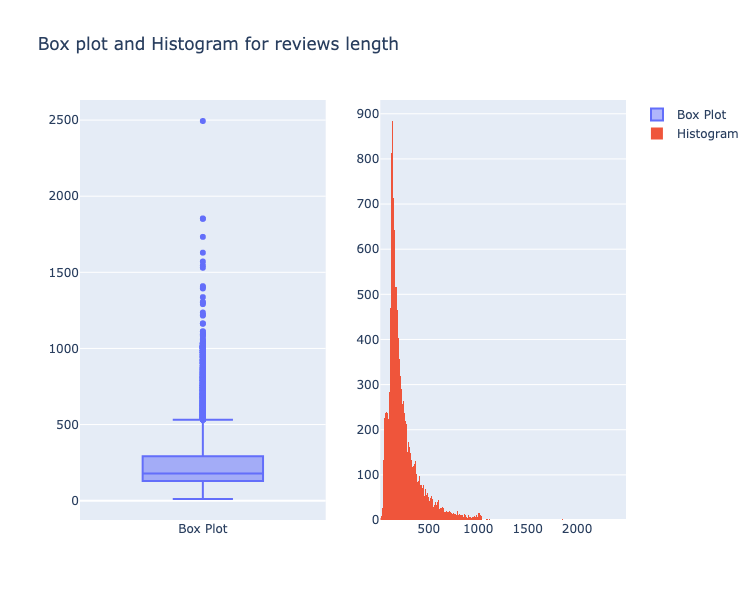

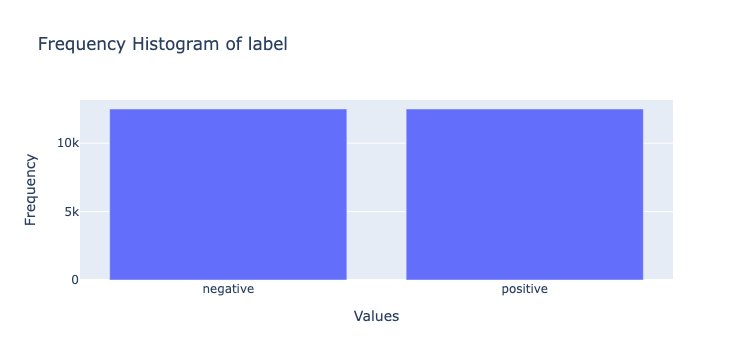

In [7]:
print(
f" x_train: {len(x_train)}\n",
f"y_train: {len(y_train)}\n",
f"x_test: {len(x_test)}\n",
f"y_test: {len(y_test)}\n",
f"category: {len(set(y_test))}"
)


# negative 0 & positive 1

reviews_length = [ len(review) for review in x_train ]

print(
f" min: {np.min(reviews_length)}\n",
f"max: {np.max(reviews_length)}\n"
)

import plotly.graph_objects as go
import plotly.subplots as sp


# Create subplots
fig = sp.make_subplots(rows=1, cols=2)

# Add box plot
fig.add_trace(go.Box(y=reviews_length, name='Box Plot'), row=1, col=1)

# Add histogram
fig.add_trace(go.Histogram(x=reviews_length, xbins=dict(size=5), name='Histogram'), row=1, col=2)

# hovertext = 
fig.update_traces(hovertext=[f'Length: {length}' for length in reviews_length], row=1, col=2)

# Set layout
fig.update_layout(height=600, width=1080, title='Box plot and Histogram for reviews length')

# Show the graph
fig.show()

# Calculate frequency
value_counts = {}
data = y_train

for value in data:
    value_counts[value] = value_counts.get(value, 0) + 1

# Extract X-axis and Y-axis data
x = list(value_counts.keys())
y = list(value_counts.values())

# Create histogram
fig = go.Figure(data=[go.Bar(x=["negative", "positive"], y=y)])

# Set layout
fig.update_layout(
    title={
        'text': 'Frequency Histogram of label',
    },
    xaxis_title='Values',
    yaxis_title='Frequency'
)

# Show the graph
fig.show()


In [8]:
import pandas as pd
df = pd.DataFrame({
    'rank': word_index.values(),
    'word': word_index.keys()
}).sort_values('rank')

# word frequency rank
display(
    df.head(5),
    df.tail(5)
)

,rank,word
58318,1,the
64304,2,and
37291,3,a
20340,4,of
67377,5,to


,rank,word
88571,88580,pipe's
88574,88581,copywrite
88576,88582,artbox
88579,88583,voorhees'
88581,88584,'l'


## GRU (Grated Recurrent Unit)

A gated recurrent unit (GRU) is a type of recursive neural network (RNN), an artificial neural network model used to process and predict sequence data. GRUs have a similar purpose to Long Short-Term Memory (LSTM), and are primarily used to solve long-term dependence problems in sequence data.

Unlike LSTMs, GRUs have a simple structure and consist of three gates. These three gates are as follows

1. Update Gate: Determines how much information from the previous state to keep based on the current input and the previous state.
2. Reset Gate: Determines how much information from the previous state to discard and create a new representation of the current input.
3. Hidden State: Uses the Update Gate and Reset Gate to create a new hidden state that is calculated by combining the previous state with the current input.

The main advantages of GRUs are that they are simpler, lighter, and faster to learn and predict than LSTMs; however, their handling of long-term dependencies can be less sophisticated when compared to LSTMs.


In [14]:
tb

In [15]:
import os
from tensorboard import program
tb.close()
tb = program.TensorBoard()
tb.configure(argv=[None, '--logdir', 'logs', '--load_fast=false'])

url = tb.launch()


AttributeError: 'TensorBoard' object has no attribute 'close'

In [19]:
import re

from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

import logging
logging.getLogger('tensorflow').setLevel(logging.ERROR)

# i do the padding by limiting the size of the word set to 10,000 and the maximum length of a review to 500.

vocab_size = 10000
max_len = 500

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=vocab_size)

x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

In [17]:
embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(GRU(hidden_units))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)

mc = ModelCheckpoint(os.path.join(ckcp_dir, 'GRU_model.h5'), monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(x_train, y_train, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2)

2023-05-28 07:22:28.526035: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-28 07:22:28.529448: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-28 07:22:28.533533: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/15


2023-05-28 07:22:28.980521: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-28 07:22:28.983088: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-28 07:22:28.984734: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

313/313 [==============================] - ETA: 0s - loss: 0.5361 - acc: 0.7148

2023-05-28 07:25:43.673296: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-28 07:25:43.675688: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-28 07:25:43.678685: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus


Epoch 1: val_acc improved from -inf to 0.81800, saving model to /home/jovyan/assets/002_IMDB_Movie_Review_Sentiment_Analysis/ckcp/GRU_model.h5
313/313 [==============================] - 215s 681ms/step - loss: 0.5361 - acc: 0.7148 - val_loss: 0.4019 - val_acc: 0.8180
Epoch 2/15
313/313 [==============================] - ETA: 0s - loss: 0.3530 - acc: 0.8508
Epoch 2: val_acc improved from 0.81800 to 0.87540, saving model to /home/jovyan/assets/002_IMDB_Movie_Review_Sentiment_Analysis/ckcp/GRU_model.h5
313/313 [==============================] - 233s 745ms/step - loss: 0.3530 - acc: 0.8508 - val_loss: 0.3184 - val_acc: 0.8754
Epoch 3/15
313/313 [==============================] - ETA: 0s - loss: 0.2834 - acc: 0.8903
Epoch 3: val_acc did not improve from 0.87540
313/313 [==============================] - 313s 998ms/step - loss: 0.2834 - acc: 0.8903 - val_loss: 0.3145 - val_acc: 0.8674
Epoch 4/15
313/313 [==============================] - ETA: 0s - loss: 0.2326 - acc: 0.9087
Epoch 4: val_acc

In [24]:
from tensorflow.keras.models import load_model

loaded_model = load_model('ckcp/GRU_model.h5')
print("acc: %.4f" % (loaded_model.evaluate(x_test, y_test)[1]))

2023-05-28 08:12:25.508130: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-28 08:12:25.510863: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-28 08:12:25.512472: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

782/782 [==============================] - 79s 100ms/step - loss: 0.3755 - acc: 0.8831
acc: 0.8831


In [ ]:
def sentiment_predict(new_sentence):
  # 알파벳과 숫자를 제외하고 모두 제거 및 알파벳 소문자화
  new_sentence = re.sub('[^0-9a-zA-Z ]', '', new_sentence).lower()
  encoded = []

  # 띄어쓰기 단위 토큰화 후 정수 인코딩
  for word in new_sentence.split():
    try :
      # 단어 집합의 크기를 10,000으로 제한.
      if word_to_index[word] <= 10000:
        encoded.append(word_to_index[word]+3)
      else:
      # 10,000 이상의 숫자는 <unk> 토큰으로 변환.
        encoded.append(2)
    # 단어 집합에 없는 단어는 <unk> 토큰으로 변환.
    except KeyError:
      encoded.append(2)

  pad_sequence = pad_sequences([encoded], maxlen=max_len)
  score = float(loaded_model.predict(pad_sequence)) # 예측

  if(score > 0.5):
    print("{:.2f}% 확률로 긍정 리뷰입니다.".format(score * 100))
  else:
    print("{:.2f}% 확률로 부정 리뷰입니다.".format((1 - score) * 100))